# Finding Heavy Traffic Indicators on I-94
In this project, we'll analyse a dataset about the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94). John Hogue made the dataset available, and you can download it from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

The goal of this analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. 

## Import Modules & Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

traffic = pd.read_csv('Datasets/Metro_Interstate_Traffic_Volume.csv')
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The dataset has 48,204 rows and 9 columns, and there are no null values. Each row describes traffic and weather data for a specific hour — we have data from 2012-10-02 09:00:00 until 2018-09-30 23:00:00.

We can see the following columns present in the dataset:
* `holiday`: Categorical - US National holidays plus regional holiday, Minnesota State Fair
* `temp`: Numeric - Average temperature in kelvin
* `rain_1h`: Numeric - Amount of rain in mm that occurred in the hour
* `snow_1h`: Numeric - Amount of snow in mm that occurred in the hour
* `clouds_all`: Numeric - Percentage of cloud cover
* `weather_main`: Categorical - Short textual description of the current weather
* `weather_description`: Categorical - Longer textual description of the current weather
* `date_time`: DateTime - Hour of the data collected in local CST time
* `traffic_volume`: Numeric - Hourly I-94 ATR 301 reported westbound traffic volume

The dataset documentation mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west).

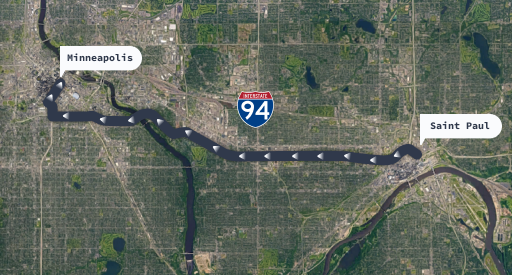

This means that the results of the analysis will be about the westbound traffic in the proximity of that station, therefore we will avoid generalising results produced for the entire I-95 highway.

## Analysing Traffic Volume

<AxesSubplot:ylabel='Frequency'>

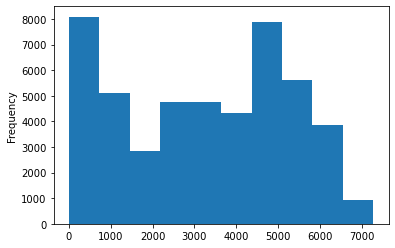

In [4]:
traffic['traffic_volume'].plot.hist()

In [5]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00, the hourly traffic volume varied from 0 to 7,280 cars, with an average of 3,260 cars.

### Day Vs. Night
It may be possible that the time of day is affecting the traffic volume, specifically during the daytime and night-time. Therefore, we can compare the daytime data with the night-time data. To do this, we can divide the dataset into two parts:
* Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
* Night-time data: hours from 7 p.m. to 7 a.m. (12 hours)


In [6]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [7]:
day = traffic[traffic['date_time'].dt.hour.between(7,18)]

In [8]:
night = traffic[(traffic['date_time'].dt.hour < 7)|(traffic['date_time'].dt.hour > 18)]
night.head(50)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
10,None,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361
13,None,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529
14,None,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963
15,None,284.63,0.0,0.0,1,Clear,sky is clear,2012-10-03 00:00:00,506
16,None,283.47,0.0,0.0,1,Clear,sky is clear,2012-10-03 01:00:00,321
17,None,281.18,0.0,0.0,1,Clear,sky is clear,2012-10-03 02:00:00,273
18,None,281.09,0.0,0.0,1,Clear,sky is clear,2012-10-03 03:00:00,367
19,None,279.53,0.0,0.0,1,Clear,sky is clear,2012-10-03 04:00:00,814


In [9]:
day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23877 entries, 0 to 48198
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              23877 non-null  object        
 1   temp                 23877 non-null  float64       
 2   rain_1h              23877 non-null  float64       
 3   snow_1h              23877 non-null  float64       
 4   clouds_all           23877 non-null  int64         
 5   weather_main         23877 non-null  object        
 6   weather_description  23877 non-null  object        
 7   date_time            23877 non-null  datetime64[ns]
 8   traffic_volume       23877 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 1.8+ MB


In [10]:
night.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24327 entries, 10 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              24327 non-null  object        
 1   temp                 24327 non-null  float64       
 2   rain_1h              24327 non-null  float64       
 3   snow_1h              24327 non-null  float64       
 4   clouds_all           24327 non-null  int64         
 5   weather_main         24327 non-null  object        
 6   weather_description  24327 non-null  object        
 7   date_time            24327 non-null  datetime64[ns]
 8   traffic_volume       24327 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 1.9+ MB


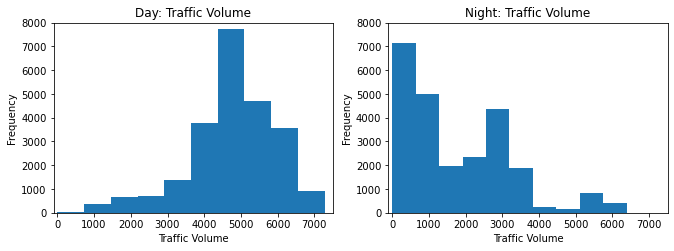

In [11]:
plt.figure(figsize=(11,3.5))

plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.xlim(-100,7500)
plt.ylim(0,8000)
plt.title('Day: Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.xlim(-100,7500)
plt.ylim(0,8000)
plt.title('Night: Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

plt.show()

From the histograms, we can see the westbound traffic volume in the daytime is left-skewed, with the traffic volume predominantly being between 3,800 and 6,500 cars. In contrast, the westbound traffic in the night-time is right-skewed, with most traffic volume being less than 4,000.

In [12]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Here, we can see that 75% of the daytime sees traffic volumes greater than 4,252, and an average of 4,762. 

In [13]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

In contrast, we can see that 75% of the night sees traffic volumes of 2,819 or less, with an average of 1,785 cars, revealing a difference of 2,977 in traffic volume averages between the daytime and night-time. As the goal of this project is to find indicators of heavy traffic, the night-time data will no longer be used in analysis.

### Time Indicators
One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day. To analyse this, line plots will be generated showing how the traffic volume changes according to the following parameters:
* Month
* Day of the week
* Time of day

In [14]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

C:\Users\mwend\AppData\Local\Temp\ipykernel_23832\2089308581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['month'] = day['date_time'].dt.month


month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

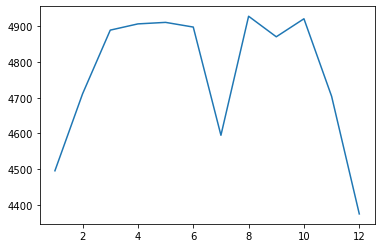

In [15]:
plt.plot(by_month['traffic_volume'])
plt.show()

From this exploratory graph, it is apparent that there is a considerable decrease in traffic volumes during the typically colder months of January, February, November and December. However, there is one outlier present as there is a signficant drop in traffic volume during July. We will now generate a line plot for the days of the week.

C:\Users\mwend\AppData\Local\Temp\ipykernel_23832\296032329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['dayofweek'] = day['date_time'].dt.dayofweek


<AxesSubplot:xlabel='dayofweek'>

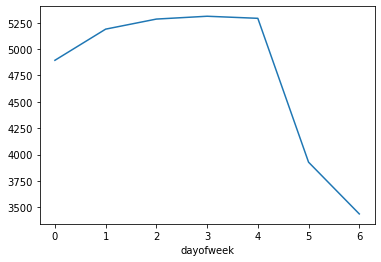

In [16]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot.line()

In this exploratory graph, we can see that there is a significant drop in traffic volume on the weekend. We will now generate a line plot for the time of day. As the weekends will drag down the average values, we will look at the averages separately, meaning splitting of the data based on the type of day: weekday or weekend.

In [17]:
day['hour'] = day['date_time'].dt.hour
weekday = day[day['dayofweek'] < 5]
weekend = day[day['dayofweek'] > 4]
by_hour_weekday = weekday.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_weekday['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


C:\Users\mwend\AppData\Local\Temp\ipykernel_23832\2137332498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['hour'] = day['date_time'].dt.hour


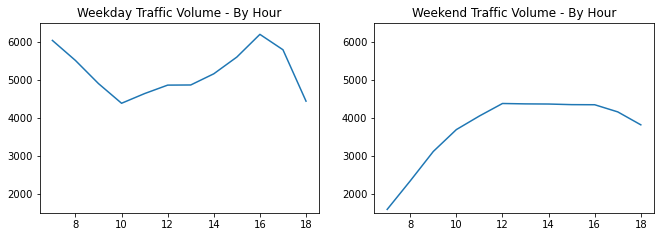

In [18]:
plt.figure(figsize = (11,3.5))

plt.subplot(1,2,1)
plt.plot(by_hour_weekday['traffic_volume'])
plt.ylim(1500,6500)
plt.title('Weekday Traffic Volume - By Hour')

plt.subplot(1,2,2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.ylim(1500,6500)
plt.title('Weekend Traffic Volume - By Hour')

plt.show()

During the weekday, the hours with the highest traffic volumes are 07:00 and 16:00. This differs to the rush hours seen during the weekend, with hours between 12:00 and 16:00 seeing relatively high traffic volume. However, what is most apparent is that every hour on a weekday sees greater traffic volumes than seen on a weekend.

Therefore, the key time indicators of heavy traffic are:
* The traffic is usually heavier during warm months (March - October) compared to colder months (November - February).
* The traffic is heavier on weekdays compared to weekends.
* On weekdays, the rush hours are around 07:00 and 16:00, likely when people are going or coming from work.
* On weekends, the highest traffic volume can be seen during the afternoon hours (12:00 - 16:00).

## Weather Indicators
Another possible indicator of heavy traffic is weather. As the dataframe contains numerical columns describing the weather, a Pearson's correlation test will be performed against the `traffic_volume` column.

In [19]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

The `temp` column shows the strongest correlation with `traffic_volume`, however, it is only at a value of +0.13 - a relatively weak positive correlation. A plot will be created to visualise this correlation.

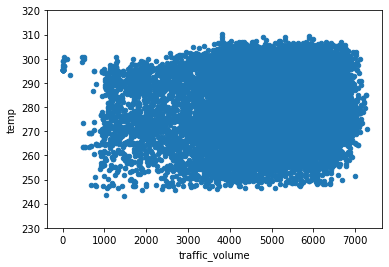

In [20]:
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(230, 320)
plt.show()

From this plot, it is clear that temperature is not a solid indicator of heavy traffic.

To see if there is anymore useful data, we can look at the categorical weather-related columns:
* `weather_main`
* `weather_description`
We can calculate the average traffic volume associated with each unique value in these two columns.

<AxesSubplot:ylabel='weather_main'>

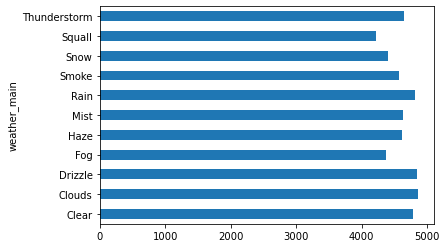

In [23]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()
by_weather_main['traffic_volume'].plot.barh()

From the 11 categorical weather types, all 11 seem to have a similar effect on the traffic volume, as all traffic volumes fall between 4000 and 5000 cars. However, it is clear that Squall, Snow and Fog play less of a role on the weather than the other weather types. 

<AxesSubplot:ylabel='weather_description'>

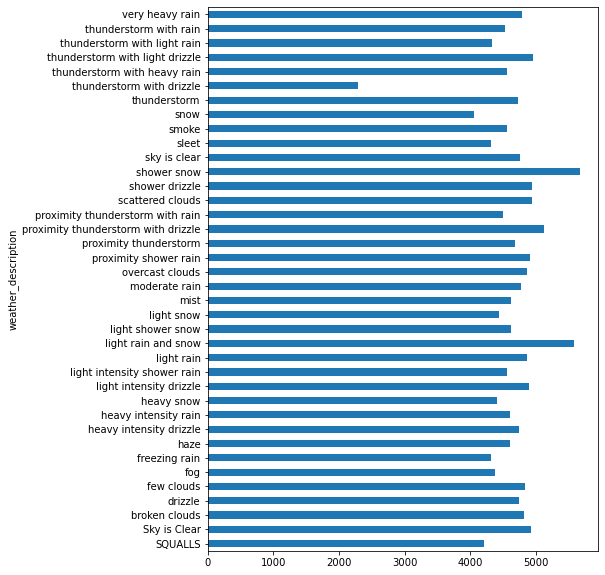

In [32]:
by_weather_description['traffic_volume'].plot.barh(figsize=(7, 10))

This horizontal bar plot shows that proximity thunderstorm with light drizzle, shower snow and light rain and snow are indicators of heavy traffic, with all 3 weather conditions leading to traffic volumes greater than 5000. Interestingly, these weather conditions are definitely not the worst from the list. It's therefore likely that these are the conditions in which most people would rather drive than walk however the conditions are not bad enough to prevent people from leaving their houses. 
## Conclusion
In this project, we attempted to identify indicators of heavy westbound traffic on the I-94 Interstate highway. Two types of indicators were found:
* Time Indicators
    * The traffic is usually heavier during warm months (March - October) compared to cold months (November - February).
    * The traffic is usually heavier on business days compared to the weekends.
    * On business days, the rush hours are around 7am and 4pm.
* Weather Indicators
    * Shower snow
    * Light rain and snow
    * Proximity thunderstorm with drizzle
